In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_csv("train_data.csv",index_col='Datetime',parse_dates=True)
# train_data

In [4]:
train_data = train_data.drop(columns=['PowerConsumption_Zone2', 'PowerConsumption_Zone3'])

In [5]:
train_data.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1
Datetime,,,,,,
2017-05-05 22:30:00,17.84,55.42,4.920,0.099,0.089,39168.00000
2017-05-05 21:30:00,18.71,49.68,4.919,0.048,0.130,43272.39344
2017-04-11 16:40:00,15.76,85.70,0.068,200.700,182.800,32489.12809
2017-09-30 21:40:00,19.19,83.60,4.919,0.073,0.122,40218.05310
2017-01-05 10:40:00,8.82,65.24,0.084,322.500,40.380,31552.40506


In [6]:
# SET THE Datetime column as an index of our train_data:
if('Datetime' in train_data.columns):
    train_data.set_index('Datetime', inplace=True)
# transform the type of index from object to datetime
train_data.index = pd.to_datetime(train_data.index)

In [7]:
# soerted the train_data by date 
train_data.sort_values(by='Datetime', inplace = True)

 # EDA

In [8]:
print('Number of NaN values present: \n' + str(train_data.isnull().sum()))

Number of NaN values present: 
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
dtype: int64


## correlation matrix

<AxesSubplot:>

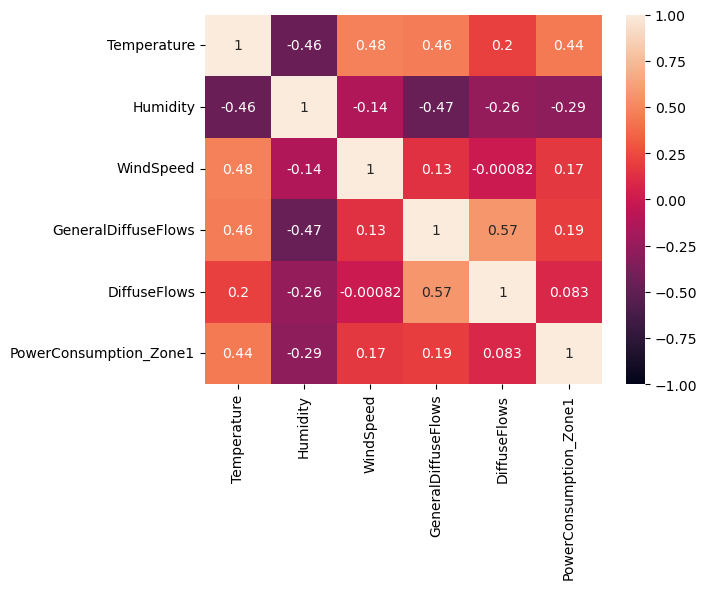

In [9]:
train_data.corr()
sns.heatmap(train_data.corr(), vmin=-1, vmax=1, annot=True)

## Feature Creation

In [10]:
def create_features(train_data):
    """
    Create time series features based on time series index.
    """
    train_data['month'] = pd.to_datetime(train_data.index).month
    train_data['dayofmonth'] = train_data.index.day
    train_data['dayOfWeek'] = pd.to_datetime(train_data.index).dayofweek
    train_data['hour'] = pd.to_datetime(train_data.index).hour
    train_data['minute'] = pd.to_datetime(train_data.index).minute     
#     train_data['Season'] = np.where(train_data['month'].isin([3,4,5]), 'Spring',
#                                 np.where(train_data['month'].isin([6,7,8]), 'Summer',
#                                 np.where(train_data['month'].isin([9, 10, 11]), 'Fall', 'Winter')))
#     train_data['Season'].replace(['Winter', 'Fall','Summer', 'Spring'], [0,3,2, 1], inplace=True)
    return train_data

In [11]:
train_data = create_features(train_data)
train_data.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,month,dayofmonth,dayOfWeek,hour,minute
Datetime,,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,1,1,6,0,0
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,1,1,6,0,10
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,1,1,6,0,20
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,1,1,6,0,30
2017-01-01 00:50:00,5.853,76.9,0.081,0.059,0.108,26624.81013,1,1,6,0,50


In [12]:
train_data.shape

(41932, 11)

## Visualisation

In [13]:
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    axes.plot(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color=color)
    axes.tick_params('y', colors=color)

Text(0, 0.5, 'Power Consumption')

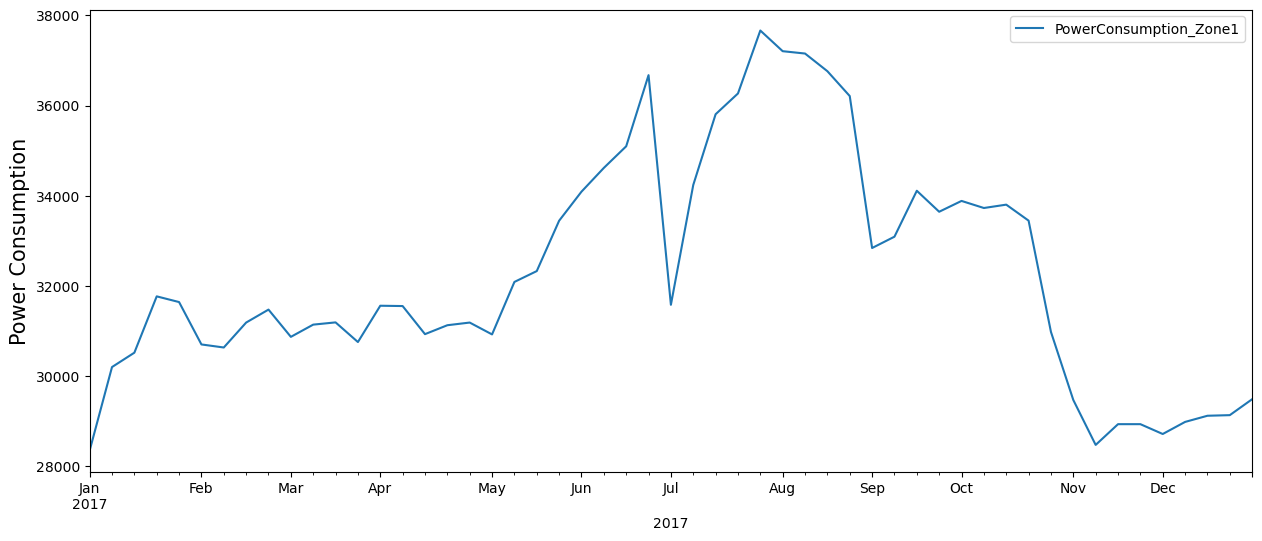

In [14]:
fig, ax = plt.subplots(figsize=(15, 6))
df_resampled = train_data["PowerConsumption_Zone1"].resample('W').mean().plot(ax=ax, legend= True)
# df_resampled = train_data["PowerConsumption_Zone2"].resample('W').mean().plot(ax=ax, legend= True)
# df_resampled = train_data["PowerConsumption_Zone3"].resample('W').mean().plot(ax=ax, legend= True)
ax.set_xlabel('2017')
ax.set_ylabel('Power Consumption', size = 15 )

## train / test split

In [15]:
# #defining input and target variable
# X_train = train_data.loc[:'10-01-2017',['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
#        'DiffuseFlows', 'month', 'dayofmonth', 'dayOfWeek', 'hour', 'minute']]
# y_train = train_data.loc[:'10-01-2017', ['PowerConsumption_Zone1']]
# X_test = train_data.loc['10-01-2017':,['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
#        'DiffuseFlows', 'month', 'dayofmonth', 'dayOfWeek', 'hour', 'minute']]
# y_test = train_data.loc['10-01-2017':, ['PowerConsumption_Zone1']]

In [16]:
from sklearn.model_selection import train_test_split

X = train_data[['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'month', 'dayofmonth', 'dayOfWeek', 'hour', 'minute']]

y = train_data[['PowerConsumption_Zone1']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## prediction

In [17]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import warnings
warnings.filterwarnings('ignore')

C:\Users\Honor\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [18]:
# def model(classifier,x_train,y_train,x_test,y_test):
    
#     classifier.fit(x_train,y_train,         
#         eval_set=[(x_train, y_train), (x_test, y_test)],
#         verbose=100)
#     prediction = classifier.predict(x_test)
#     cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)

#### TEST CLASSIFIERS

In [29]:
from sklearn.metrics import r2_score

In [30]:
def model(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    mse = mean_squared_error(y_test, prediction)
    r2 = r2_score(y_test, prediction)
    print('Mean Squared Error:', mse)
    print('R-squared:', r2)

In [31]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
model(dt_regressor, X_train, y_train, X_test, y_test)

Mean Squared Error: 1549401.3726291999
R-squared: 0.9696434086062696


In [32]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
model(rf_regressor, X_train, y_train, X_test, y_test)

Mean Squared Error: 764674.9657066704
R-squared: 0.98501813287826


In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr, X_train, y_train, X_test, y_test)

Mean Squared Error: 17740113.69816876
R-squared: 0.6524274520941011


In [39]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree', n_estimators=2200,
                       objective='reg:squarederror', max_depth=6,learning_rate=0.04, random_state = 48)
model(reg, X_train, y_train, X_test, y_test)

Mean Squared Error: 696654.8701223659
R-squared: 0.9863508141864683


<AxesSubplot:>

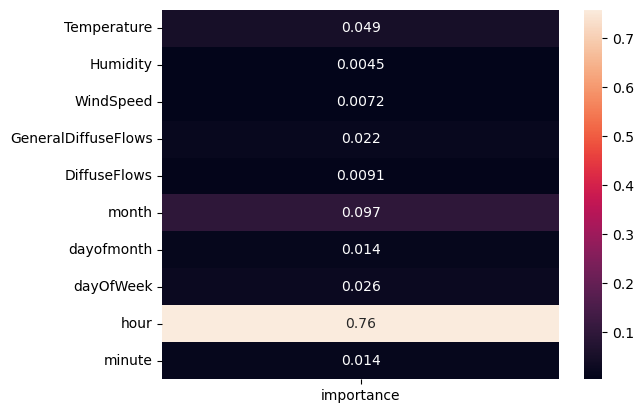

In [40]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=X_train.columns,
             columns=['importance'])
sns.heatmap(fi, annot=True)

In [36]:
# sns.lineplot(data=y_test[['PowerConsumption_Zone1', 'prediction']])

## TEST

In [37]:
test_data = pd.read_csv("test_data.csv",index_col='Datetime',parse_dates=True)

In [38]:
test_data

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
Datetime,,,,,
2017-02-12 14:40:00,13.28,82.80,0.074,127.000,128.400
2017-11-22 15:30:00,15.72,48.38,4.923,126.200,119.900
2017-10-15 01:50:00,17.25,85.80,0.079,0.055,0.130
2017-09-11 23:00:00,21.66,60.52,0.270,0.102,0.104
2017-12-26 01:20:00,8.75,79.90,0.079,0.066,0.126
...,...,...,...,...,...
2017-02-01 13:00:00,12.39,47.18,4.920,581.400,623.500
2017-05-17 14:40:00,21.70,65.90,4.919,780.000,313.900
2017-09-03 07:00:00,20.34,54.32,4.924,9.500,6.165


In [24]:
test_data = create_features(test_data)
test_data.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'month', 'dayofmonth', 'dayOfWeek', 'hour', 'minute'],
      dtype='object')

In [25]:
test = test_data[['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'month', 'dayofmonth', 'dayOfWeek', 'hour', 'minute']]

In [26]:
test_data['prediction_Zone1'] = reg.predict(test)

NameError: name 'reg' is not defined

In [ ]:
test_data.head()

In [ ]:
sample = pd.read_csv("sample_data.csv",index_col='Datetime')
sample = sample.drop(columns=['predicted_Zone2','predicted_Zone3'])

In [27]:
sample['predicted_Zone1'] = test_data['prediction_Zone1']
sample

KeyError: 'prediction_Zone1'

In [28]:
# CREAT SUBMISSION TABLE
sample.to_csv("subZone1.csv",index=True)

NameError: name 'sample' is not defined